<a href="https://colab.research.google.com/github/toryn13/Rexamples/blob/main/R_example_PTG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up R in Google Colab. 

Colab is a virtual computing environment, which uses Python and many other languages.

Run the code below to enable R, every cell that runs R will need to start with %%R

In [1]:
%load_ext rpy2.ipython

Here are the packages we need. The Tidyverse is already installed into Colab.

In [2]:
%%R
install.packages("cowplot")
install.packages("rstatix")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/cowplot_1.1.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1353271 bytes (1.3 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

We also need the package "Magick". A slighly more complicated install

In [3]:
%%R
system('add-apt-repository -y ppa:cran/imagemagick')
system('apt-get update')
system("apt-get install libmagick++-dev")
install.packages("magick")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/magick_2.7.3.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 4813163 bytes (4.6 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[writ

Now we load the packages 

In [4]:
%%R
library(tidyverse)
library(cowplot)
library(magick)
library(readxl)
library(rstatix)


R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R[write to console]: Linking to ImageMagick 6.9.7.4
Enabled features: fontconfig, freetype, fftw, lcms, pango, x11
Disabled features: cairo, ghostscript, heic, raw, rsvg, webp

R[write to console]: Using 2 threads

R[write to console]: 
Attaching package: ‘rstatix’


R[write to console]: The following object is masked from ‘package:stats’:

    filter




## Files

In [5]:
!wget  "https://raw.githubusercontent.com/toryn13//Rexamples/main/cat.jpg"
!wget  "https://raw.githubusercontent.com/toryn13//Rexamples/main/IL6.xlsx"
!wget  "https://raw.githubusercontent.com/toryn13//Rexamples/main/IL6plate.xls"
!wget  "https://raw.githubusercontent.com/toryn13//Rexamples/main/p53.jpeg"

--2022-07-07 07:01:58--  https://raw.githubusercontent.com/toryn13//Rexamples/main/cat.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /toryn13/Rexamples/main/cat.jpg [following]
--2022-07-07 07:01:58--  https://raw.githubusercontent.com/toryn13/Rexamples/main/cat.jpg
Reusing existing connection to raw.githubusercontent.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 41045 (40K) [image/jpeg]
Saving to: ‘cat.jpg.4’

cat.jpg.4           100%[===================>]  40.08K  --.-KB/s    in 0.001s  

2022-07-07 07:01:59 (26.8 MB/s) - ‘cat.jpg.4’ saved [41045/41045]

--2022-07-07 07:01:59--  https://raw.githubusercontent.com/toryn13//Rexamples/main/IL6.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.1

## Importing data

We're using read_excel, if you have a tsv, csv or text. Use the readr package. Excel sheets or regions of cells can be imported.

R has many data structures. These include

- vector
- list
- matrix
- data frame
- factors

In [6]:
%%R
elisa_data<-read_excel("IL6plate.xls", skip=1,n_max = 9)

New names:
• `` -> `...1`


## Add/change column names

In [7]:
%%R
standards<-read_excel("IL6plate.xls", range = "A14:D22")
colnames(standards)<-c("cell", "Conc", "rep1", "rep2")

New names:
• `` -> `...1`
• `` -> `...4`


## Changing the data structure, long vs wide. Tidydata!

In [8]:
%%R
standardsL<-pivot_longer(standards, starts_with("rep"), names_to = "replicate", values_to = "Abs")

In [9]:
%%R
standardsL

# A tibble: 16 × 4
   cell    Conc replicate   Abs
   <chr>  <dbl> <chr>     <dbl>
 1 A       0    rep1      0.054
 2 A       0    rep2      0.052
 3 B       7.81 rep1      0.134
 4 B       7.81 rep2      0.126
 5 C      15.6  rep1      0.183
 6 C      15.6  rep2      0.187
 7 D      31.2  rep1      0.307
 8 D      31.2  rep2      0.31 
 9 E      62.5  rep1      0.548
10 E      62.5  rep2      0.553
11 F     125    rep1      0.953
12 F     125    rep2      0.949
13 G     250    rep1      1.68 
14 G     250    rep2      1.65 
15 H     500    rep1      2.59 
16 H     500    rep2      2.54 


## Using GGPLOT2

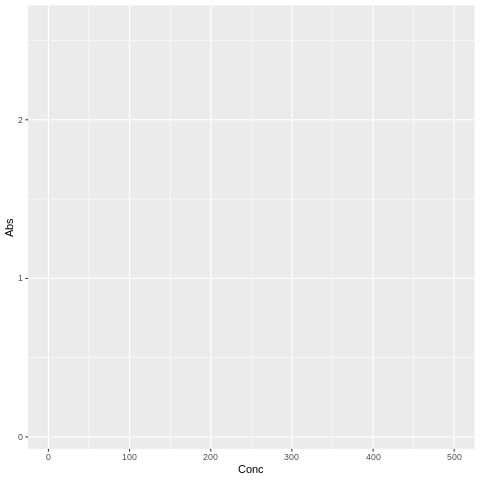

In [10]:
%%R
standardsL%>%ggplot(aes(Conc,Abs))

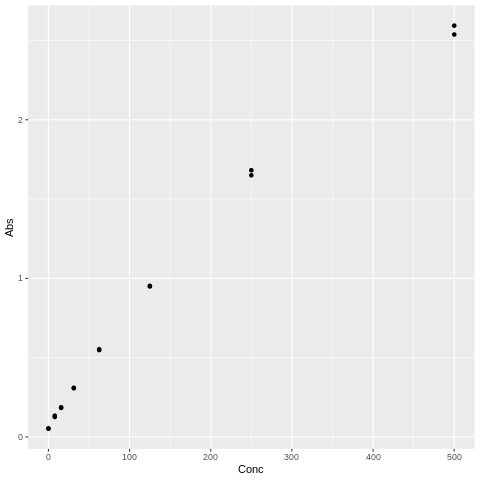

In [11]:
%%R
standardsL%>%ggplot(aes(Conc,Abs))+geom_point()

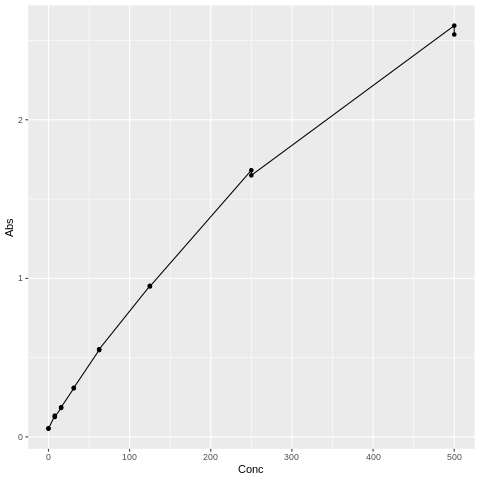

In [12]:
%%R
standardsL%>%ggplot(aes(Conc,Abs))+geom_point()+geom_line()

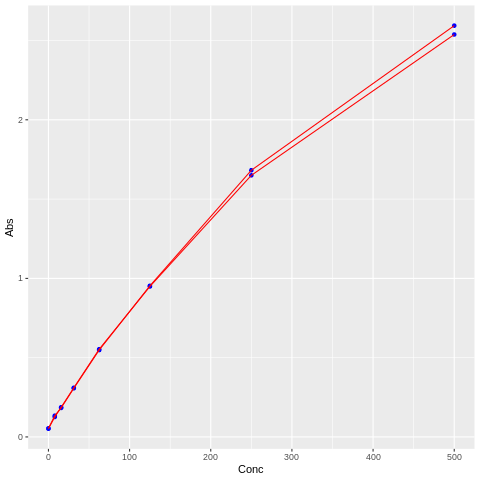

In [13]:
%%R
standardsL%>%ggplot(aes(Conc,Abs, group=replicate))+geom_point(colour="blue")+geom_line(colour="red")

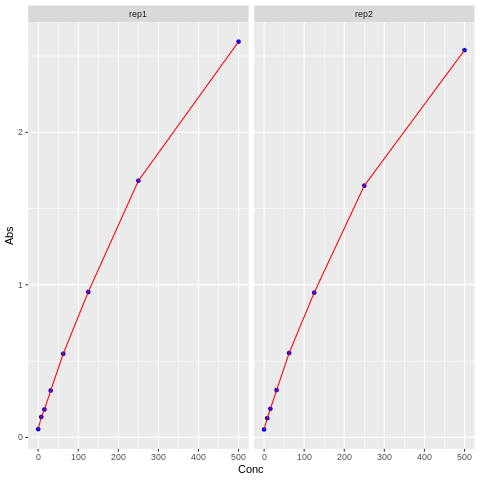

In [14]:
%%R
standardsL%>%ggplot(aes(Conc,Abs, group=replicate))+geom_point(colour="blue")+geom_line(colour="red")+facet_grid(.~replicate)

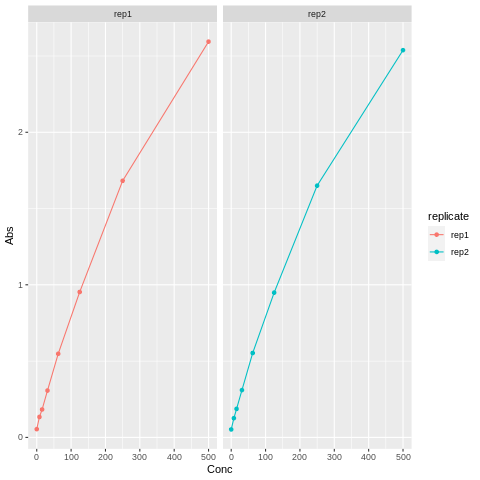

In [15]:
%%R
standardsL%>%ggplot(aes(Conc,Abs, color=replicate))+geom_point()+geom_line()+facet_grid(.~replicate)

R[write to console]: `geom_smooth()` using formula 'y ~ x'



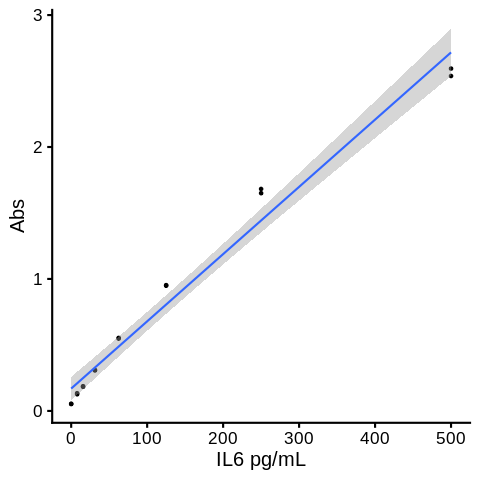

In [16]:
%%R
curve<-standardsL%>%ggplot(aes(Conc,Abs))+geom_point()+geom_smooth(method="lm")+theme_cowplot(font_size=20, line_size = 1)+xlab(c("IL6 pg/mL"))
curve

#Modifying values and creating new variables

In [17]:
%%R
IL6<-read_excel("IL6.xlsx")
IL6<-IL6%>%mutate(Treat2 = case_when(Treat=="Control"~"1", Treat=="PHA"~"2"))
IL6$Conc<-(IL6$Conc)/1000



Factors

In [18]:
%%R
IL6$Treat2<-as.numeric(IL6$Treat2)
IL6$Treat2<-factor(IL6$Treat2)
IL6$Day<-factor(IL6$Day)

### Boxplots

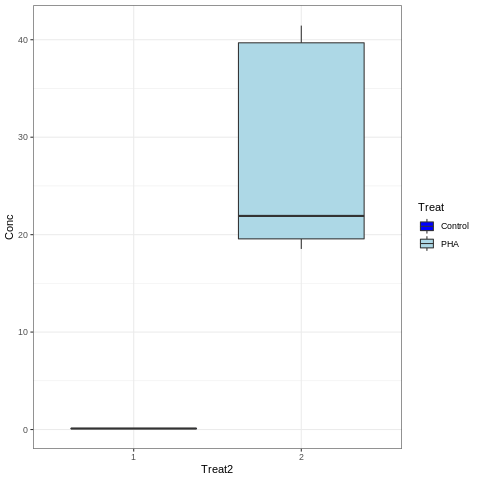

In [19]:
%%R
IL6%>%ggplot(aes(Treat2, Conc,fill=Treat))+geom_boxplot()+scale_fill_manual(values=c('blue', 'lightblue'))+theme_bw()

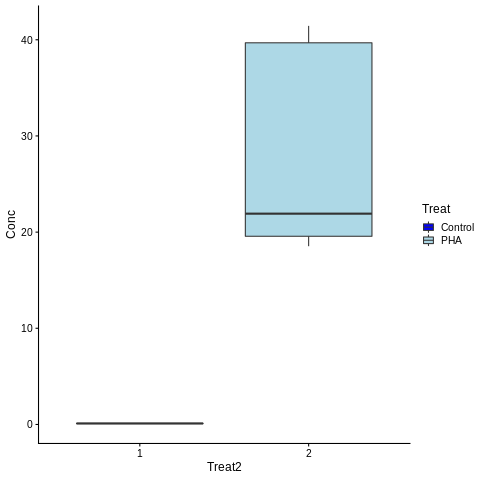

In [20]:
%%R
IL6%>%ggplot(aes(Treat2, Conc,fill=Treat))+geom_boxplot()+scale_fill_manual(values=c('blue', 'lightblue'))+theme_cowplot(12)

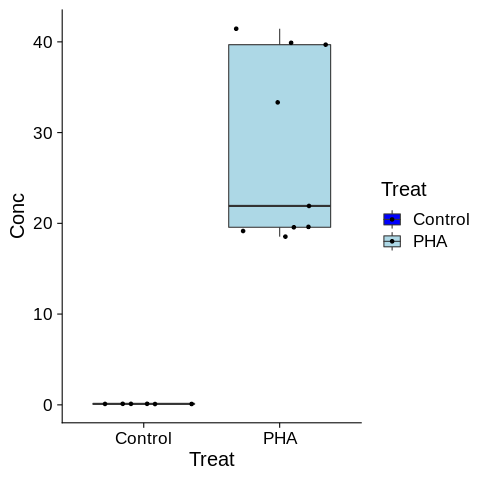

In [21]:
%%R
IL6%>%ggplot(aes(Treat, Conc,fill=Treat))+geom_boxplot()+geom_jitter()+scale_fill_manual(values=c('blue', 'lightblue'))+theme_cowplot(font_size=20)

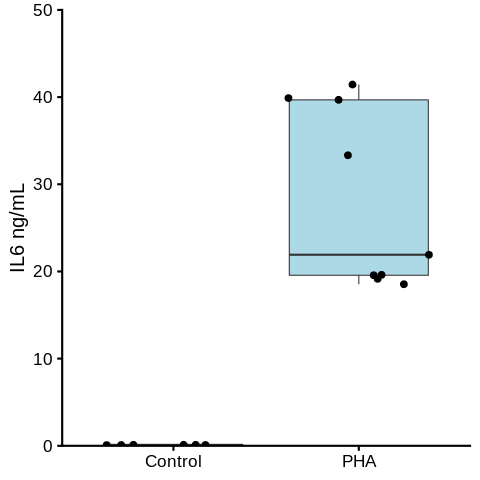

In [22]:
%%R
boxplot<-IL6%>%ggplot(aes(Treat, Conc,fill=Treat))+geom_boxplot()+geom_jitter(size=3)+
scale_fill_manual(values=c('blue', 'lightblue'))+
theme_cowplot(font_size=20, line_size=1)+theme(legend.position='none')+
xlab(NULL)+ylab("IL6 ng/mL")+
scale_y_continuous(limits = c(0, 50), expand = c(0, 0))
boxplot

## Create a summary

In [23]:
%%R
sumIl6<-IL6%>%group_by(Treat,Day)%>%summarise(meanIL6=mean(Conc), sdIL6=sd(Conc))
sumIl6

`summarise()` has grouped output by 'Treat'. You can override using the
`.groups` argument.
# A tibble: 4 × 4
# Groups:   Treat [2]
  Treat   Day   meanIL6   sdIL6
  <chr>   <fct>   <dbl>   <dbl>
1 Control 1      0.110  0.00213
2 Control 3      0.0940 0.00618
3 PHA     1     19.8    1.28   
4 PHA     3     38.6    3.59   


In [24]:
%%R
sumIl6$Day<-factor(sumIl6$Day)

Bar Graphs

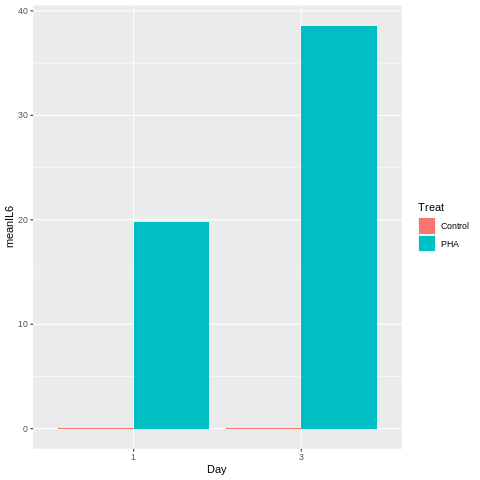

In [25]:
%%R
#sumIl6%>%ggplot(aes(Day, meanIL6, fill=Treat))+geom_bar()
sumIl6%>%ggplot(aes(Day, meanIL6, fill=Treat))+geom_bar(stat="identity")
sumIl6%>%ggplot(aes(Day, meanIL6, fill=Treat))+geom_bar(stat="identity",position = position_dodge())


Error bars

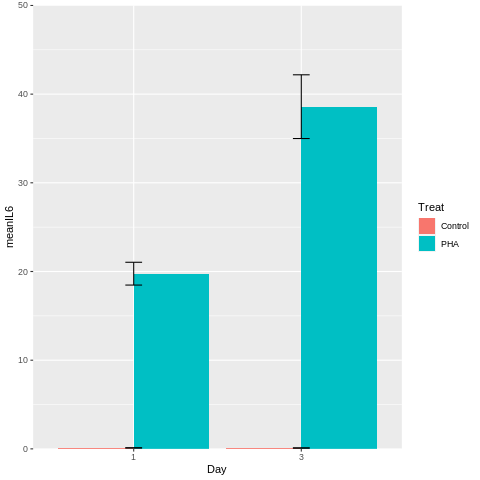

In [26]:
%%R
sumIl6%>%ggplot(aes(Day, meanIL6, fill=Treat))+geom_bar(stat="identity", position = position_dodge())+
geom_errorbar(aes(ymin = meanIL6-sdIL6, ymax = meanIL6+sdIL6), width=.1)+
scale_y_continuous(limits = c(0, 50), expand = c(0, 0))

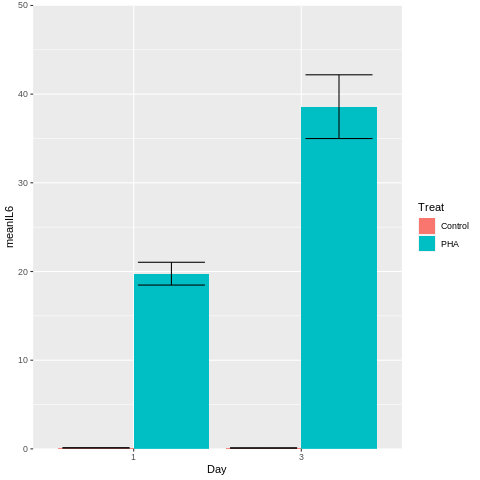

In [27]:
%%R
sumIl6%>%ggplot(aes(Day, meanIL6, fill=Treat))+geom_bar(stat="identity", position = position_dodge())+
geom_errorbar(aes(ymin = meanIL6-sdIL6, ymax = meanIL6+sdIL6),position=position_dodge(.9), width=0.8)+
scale_y_continuous(limits = c(0, 50), expand = c(0, 0))

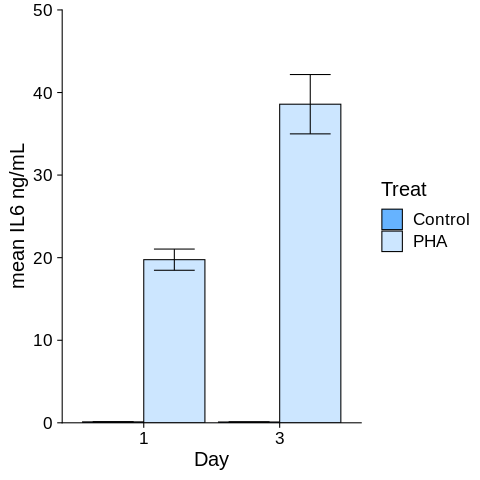

In [28]:
%%R
p2<-sumIl6%>%ggplot(aes(Day, meanIL6, fill=Treat))+geom_bar(stat="identity", position = position_dodge(),colour="black")+
geom_errorbar(aes(ymin = meanIL6-sdIL6, ymax = meanIL6+sdIL6),position=position_dodge(.9), width=0.6)+
scale_y_continuous(limits = c(0, 50), expand = c(0, 0))+
scale_fill_manual(values=c('#66b3ff','#cce6ff'))+theme_cowplot(font_size = 20)+
ylab("mean IL6 ng/mL")
p2

R[write to console]: Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.



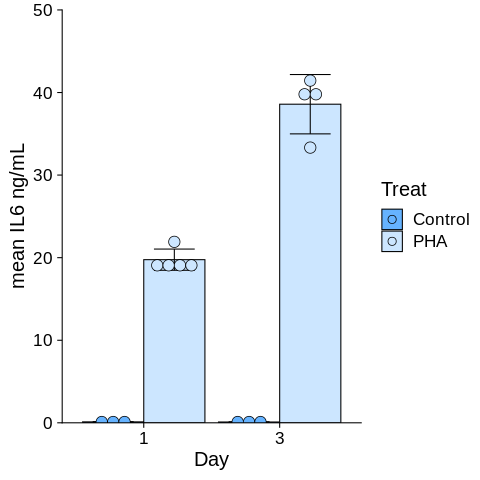

In [29]:
%%R
p3<-p2+geom_dotplot(data=IL6, aes(Day, Conc, fill=Treat),binaxis = "y",stackdir = "center", binpositions="all", position="dodge" )
p3

In [30]:
%%R
str(IL6)
IL6$Treat<-factor(IL6$Treat)

tibble [15 × 4] (S3: tbl_df/tbl/data.frame)
 $ Treat : chr [1:15] "Control" "Control" "Control" "PHA" ...
 $ Conc  : num [1:15] 0.111 0.111 0.107 18.534 19.611 ...
 $ Day   : Factor w/ 2 levels "1","3": 1 1 1 1 1 1 1 1 2 2 ...
 $ Treat2: Factor w/ 2 levels "1","2": 1 1 1 2 2 2 2 2 1 1 ...


So many plot options and annotations

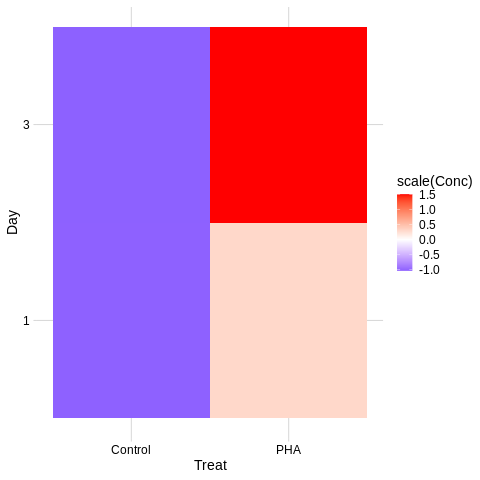

In [31]:
%%R
heat_map <- IL6%>%ggplot(aes(x = Day,y = Treat, fill = scale(Conc))) + geom_tile()+
scale_fill_gradient2(low = "blue", mid="white", high = "red")+coord_flip()+theme_minimal_grid()
heat_map

# Simple statistics

In [32]:
%%R
IL6$group<-factor(paste0(IL6$Treat,"_",IL6$Day))
str(IL6)

tibble [15 × 5] (S3: tbl_df/tbl/data.frame)
 $ Treat : Factor w/ 2 levels "Control","PHA": 1 1 1 2 2 2 2 2 1 1 ...
 $ Conc  : num [1:15] 0.111 0.111 0.107 18.534 19.611 ...
 $ Day   : Factor w/ 2 levels "1","3": 1 1 1 1 1 1 1 1 2 2 ...
 $ Treat2: Factor w/ 2 levels "1","2": 1 1 1 2 2 2 2 2 1 1 ...
 $ group : Factor w/ 4 levels "Control_1","Control_3",..: 1 1 1 3 3 3 3 3 2 2 ...


In [33]:
%%R
IL6%>%t_test(Conc~Treat)

# A tibble: 1 × 8
  .y.   group1  group2    n1    n2 statistic    df         p
* <chr> <chr>   <chr>  <int> <int>     <dbl> <dbl>     <dbl>
1 Conc  Control PHA        6     9     -8.24  8.00 0.0000354


In [34]:
%%R
IL6%>%filter(group=="Control_1")
IL6%>%filter(group!="Control_1")
IL6%>%filter(group %in% c("PHA_1", "PHA_3"))
pha<-IL6%>%filter(group %in% c("PHA_1", "PHA_3"))

In [35]:
%%R
pha

# A tibble: 9 × 5
  Treat  Conc Day   Treat2 group
  <fct> <dbl> <fct> <fct>  <fct>
1 PHA    18.5 1     2      PHA_1
2 PHA    19.6 1     2      PHA_1
3 PHA    19.2 1     2      PHA_1
4 PHA    19.6 1     2      PHA_1
5 PHA    21.9 1     2      PHA_1
6 PHA    33.3 3     2      PHA_3
7 PHA    39.7 3     2      PHA_3
8 PHA    39.9 3     2      PHA_3
9 PHA    41.4 3     2      PHA_3


Base R t test ussing "," or "~"

In [36]:
%%R
pha
t.test(Conc~group,data=pha)


	Welch Two Sample t-test

data:  Conc by group
t = -9.988, df = 3.6147, p-value = 0.0009248
alternative hypothesis: true difference in means between group PHA_1 and group PHA_3 is not equal to 0
95 percent confidence interval:
 -24.29456 -13.36959
sample estimates:
mean in group PHA_1 mean in group PHA_3 
           19.75627            38.58835 



In [37]:
%%R
IL6 %>%
t_test(data =., Conc ~ group) %>%
adjust_pvalue(method = "bonferroni") %>%
add_significance("p.adj")

# A tibble: 6 × 10
  .y.   group1   group2    n1    n2 statistic    df       p   p.adj p.adj.signif
  <chr> <chr>    <chr>  <int> <int>     <dbl> <dbl>   <dbl>   <dbl> <chr>       
1 Conc  Control… Contr…     3     3      4.15  2.47 3.7 e-2 2.22e-1 ns          
2 Conc  Control… PHA_1      3     5    -34.3   4.00 4.33e-6 2.60e-5 ****        
3 Conc  Control… PHA_3      3     4    -21.4   3.00 2.23e-4 1.34e-3 **          
4 Conc  Control… PHA_1      3     5    -34.3   4.00 4.32e-6 2.59e-5 ****        
5 Conc  Control… PHA_3      3     4    -21.4   3.00 2.22e-4 1.33e-3 **          
6 Conc  PHA_1    PHA_3      5     4     -9.99  3.61 9.25e-4 5.55e-3 **          


# Add annotations to ggplot

R[write to console]: Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.



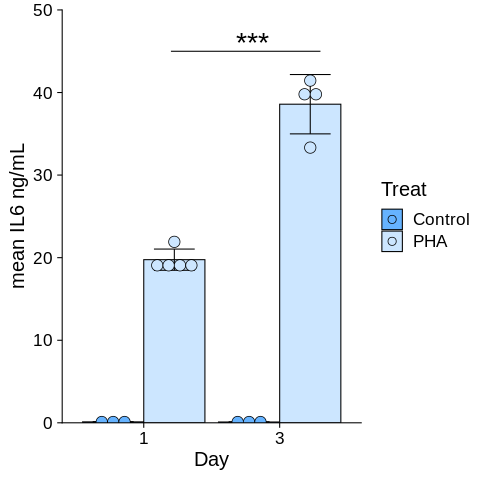

In [38]:
%%R
bar<-p3+annotate("segment", x = 1.2, xend = 2.3, y = 45,yend=45,
  colour = "black")+annotate("text",x = 1.8, y = 46, label="***",size=10)
bar

# Example with image Magick

In [39]:
%%R
cat<-image_read("cat.jpg")
#format width height 
#JPEG     389    428
#crop image Crop image to a by b at position c,d
crop_cat<-image_crop(cat, "200x200+100+100")

#scale to width
small_cat<-image_scale(cat, "200")
small_crop_cat<-image_scale(crop_cat, "100")

In [40]:
%%R
image_write(small_cat, path = "small_cat.png", format = "png")
image_write(crop_cat, path = "crop_cat.png", format = "png")
image_write(small_crop_cat, path = "small_crop_cat.png", format = "png")

# Example using a western blot

Images can be resized and converted

In [41]:
%%R
a<-image_read("p53.jpeg")
print(a)
a<-image_convert(a, "png")
a<-image_crop(a, "150x250+220+350")

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 JPEG     703    806 sRGB       FALSE    31956 96x96  


In [42]:
%%R
a_text<-image_annotate(a, "1      2", size = 35, gravity = "North", color = "black")
a_text<-image_annotate(a_text, "Crop from p53 blot", size = 12, gravity = "south", color = "black")

image_write(a_text, path = "crop.png", format = "png")

In [43]:
%%R
blot<-ggdraw() +
draw_image("crop.png")

#Adding images to GGPLOT2

In [44]:
%%R
C1=seq(1:10)
C2=seq(1:10)
frame<-data.frame(C1,C2)
frame

   C1 C2
1   1  1
2   2  2
3   3  3
4   4  4
5   5  5
6   6  6
7   7  7
8   8  8
9   9  9
10 10 10


In [45]:
%%R
graph<-frame%>%ggplot(aes(C1, C2))+geom_point(color="white")+theme_nothing()+annotate("segment", x = 0, xend = 0.9, y =  5.5,yend=5.5,
  colour = "black", arrow=arrow())+annotate("segment", x = 0, xend = 0.9, y =  7.5,yend=7.5,
  colour = "black", arrow=arrow())+annotate("text",x = 9, y = 5.5, label="p53",size=10)

In [46]:
%%R
img<-a_text%>%image_draw()
blot2<-ggdraw()+draw_plot(graph)+draw_image(img)

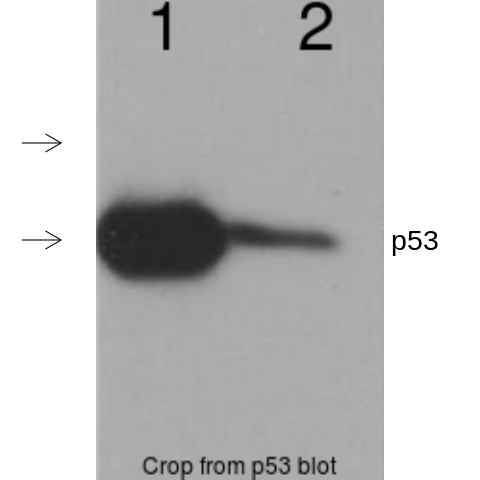

In [47]:
%%R
blot2

#Combining plots

In [48]:
%%R

plot_grid(curve,bar, labels = "AUTO")
ggsave("example.pdf")


plot_grid(blot2,boxplot, labels = "AUTO", scale = c(0.7, .9))
ggsave("example2.pdf")


R[write to console]: `geom_smooth()` using formula 'y ~ x'

R[write to console]: Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.

R[write to console]: Saving 6.67 x 6.67 in image

R[write to console]: Saving 6.67 x 6.67 in image

